# Hypothesis Testing on wind speed dataset

# 1. Exploratory Data Analysis

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

### 1.1 Loading dataset

In [2]:
df = pd.read_excel(r"G:\Data analyst\8. Hypothesis Testing\edinburgh_final.xlsx")
df.head(2)

,Column1,Date,Day,Month,Year,Hour,Wind - Mean Speed (kn),NB1,Wind - Mean Direction,NB2,Wind - Max Gust Speed (kn),NB3,Pressure at Mean Sea Level (hPa),NB4,Relative Humidity,NB5,Temperature - Dry Bulb (°C),NB6
0,1999-2004,1999-01-01,1.0,1.0,1999.0,00:00:00,7.0,,NaN,-,8.0,,998.099976,,93.300003,,3.8,
1,1999-2004,1999-01-01,1.0,1.0,1999.0,01:00:00,4.0,,NaN,-,11.0,,997.599976,,96.599998,,4.3,


In [3]:
df.shape

(87674, 18)

In [4]:
des=round(df.describe(),2)
des

,Date,Day,Month,Year,Wind - Mean Speed (kn),Wind - Mean Direction,Wind - Max Gust Speed (kn),Pressure at Mean Sea Level (hPa),Relative Humidity,Temperature - Dry Bulb (°C)
count,87672,87672.00,87672.00,87672.00,85671.00,85096.00,85876.00,85765.00,85295.00,85913.00
mean,2004-01-01 00:00:00.000000128,15.73,6.52,2003.50,8.16,198.16,14.98,1012.03,80.53,9.31
min,1999-01-01 00:00:00,1.00,1.00,1999.00,0.00,0.00,0.00,949.70,25.10,-10.70
25%,2001-07-02 00:00:00,8.00,4.00,2001.00,4.00,130.00,8.00,1004.10,73.40,5.70
50%,2004-01-01 00:00:00,16.00,7.00,2004.00,7.00,230.00,14.00,1012.90,82.50,9.40
75%,2006-07-02 00:00:00,23.00,10.00,2006.00,11.00,250.00,20.00,1021.00,89.80,13.00
max,2008-12-31 00:00:00,31.00,12.00,2008.00,41.00,360.00,71.00,1045.90,100.00,27.90
std,NaN,8.80,3.45,2.87,5.15,85.87,8.67,12.77,12.47,5.14


In [5]:
df.dtypes

Column1                                     object
Date                                datetime64[ns]
Day                                        float64
Month                                      float64
Year                                       float64
Hour                                        object
Wind - Mean Speed (kn)                     float64
NB1                                         object
Wind - Mean Direction                      float64
NB2                                         object
Wind - Max Gust Speed (kn)                 float64
NB3                                         object
Pressure at Mean Sea Level (hPa)           float64
NB4                                         object
Relative Humidity                          float64
NB5                                         object
Temperature - Dry Bulb (°C)                float64
NB6                                         object
dtype: object

### 1.2 Missing value

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87674 entries, 0 to 87673
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Column1                           87674 non-null  object        
 1   Date                              87672 non-null  datetime64[ns]
 2   Day                               87672 non-null  float64       
 3   Month                             87672 non-null  float64       
 4   Year                              87672 non-null  float64       
 5   Hour                              87672 non-null  object        
 6   Wind - Mean Speed (kn)            85671 non-null  float64       
 7   NB1                               87674 non-null  object        
 8   Wind - Mean Direction             85096 non-null  float64       
 9   NB2                               87674 non-null  object        
 10  Wind - Max Gust Speed (kn)        85876 non-nu

In [7]:
df.isnull().sum()

Column1                                0
Date                                   2
Day                                    2
Month                                  2
Year                                   2
Hour                                   2
Wind - Mean Speed (kn)              2003
NB1                                    0
Wind - Mean Direction               2578
NB2                                    0
Wind - Max Gust Speed (kn)          1798
NB3                                    0
Pressure at Mean Sea Level (hPa)    1909
NB4                                    0
Relative Humidity                   2379
NB5                                    0
Temperature - Dry Bulb (°C)         1761
NB6                                    0
dtype: int64

*  A Wind speed Time series data the missing values can be fill using the bfill or ffill methods, as the wind speed does not normally vary alot during within certain day.

In [8]:
df1=df.fillna(method='bfill')

In [9]:
df1.isnull().sum().sum()

0

# 2. Feature Engineering

In [10]:
df1.NB1.unique()

array([' ', '  -', 'NB1'], dtype=object)

* The NB1 to NB6 columns are null columns filled with " " or "-", without any useful metrics. This must be removed.

In [11]:
col=df1.columns.values[7:18:2]
col

array(['NB1', 'NB2', 'NB3', 'NB4', 'NB5', 'NB6'], dtype=object)

In [12]:
df1.drop(col,axis=1,inplace=True)
df1.head(2)

,Column1,Date,Day,Month,Year,Hour,Wind - Mean Speed (kn),Wind - Mean Direction,Wind - Max Gust Speed (kn),Pressure at Mean Sea Level (hPa),Relative Humidity,Temperature - Dry Bulb (°C)
0,1999-2004,1999-01-01,1.0,1.0,1999.0,00:00:00,7.0,260.0,8.0,998.099976,93.300003,3.8
1,1999-2004,1999-01-01,1.0,1.0,1999.0,01:00:00,4.0,260.0,11.0,997.599976,96.599998,4.3


* Removing unwanted columns

In [13]:
df2=df1.drop([ 'Column1','Day', 'Hour'],axis=1)
df2.head(2)

,Date,Month,Year,Wind - Mean Speed (kn),Wind - Mean Direction,Wind - Max Gust Speed (kn),Pressure at Mean Sea Level (hPa),Relative Humidity,Temperature - Dry Bulb (°C)
0,1999-01-01,1.0,1999.0,7.0,260.0,8.0,998.099976,93.300003,3.8
1,1999-01-01,1.0,1999.0,4.0,260.0,11.0,997.599976,96.599998,4.3


**The data is stored by every hour for 10 years, converting it to mean windspeed by each day**

In [14]:
col2=df2.columns[1:10]
col2

Index(['Month', 'Year', 'Wind - Mean Speed (kn)', 'Wind - Mean Direction',
       'Wind - Max Gust Speed (kn)', 'Pressure at Mean Sea Level (hPa)',
       'Relative Humidity', 'Temperature - Dry Bulb (°C)'],
      dtype='object')

In [15]:
df3=round(df2.groupby(df['Date'])[col2].mean(),2)
df3 = df3.reset_index().rename(columns={"index":"date"})
df3.head(4)

,Date,Month,Year,Wind - Mean Speed (kn),Wind - Mean Direction,Wind - Max Gust Speed (kn),Pressure at Mean Sea Level (hPa),Relative Humidity,Temperature - Dry Bulb (°C)
0,1999-01-01,1.0,1999.0,7.33,260.0,16.75,993.46,81.42,6.70
1,1999-01-02,1.0,1999.0,15.21,260.0,28.08,979.24,79.92,6.60
2,1999-01-03,1.0,1999.0,13.25,260.0,22.75,989.82,80.05,5.12
3,1999-01-04,1.0,1999.0,22.29,260.0,39.83,986.47,71.65,6.82


In [16]:
df.shape

(87674, 18)

In [17]:
df3.shape

(3653, 9)

* The data is now stored for each day by having the mean value for all the metrices.

In [18]:
col3=df3.columns[3:]
col3

Index(['Wind - Mean Speed (kn)', 'Wind - Mean Direction',
       'Wind - Max Gust Speed (kn)', 'Pressure at Mean Sea Level (hPa)',
       'Relative Humidity', 'Temperature - Dry Bulb (°C)'],
      dtype='object')

In [19]:
df4=round(df3.groupby(['Year','Month'])[col3].mean(),2)
df4 = df4.reset_index().rename(columns={"index":"date"})
df4.head(4)

,Year,Month,Wind - Mean Speed (kn),Wind - Mean Direction,Wind - Max Gust Speed (kn),Pressure at Mean Sea Level (hPa),Relative Humidity,Temperature - Dry Bulb (°C)
0,1999.0,1.0,10.77,231.12,19.17,1003.29,82.68,4.46
1,1999.0,2.0,12.10,243.07,20.94,1012.36,77.58,4.37
2,1999.0,3.0,9.18,229.56,16.70,1006.94,77.79,6.26
3,1999.0,4.0,8.30,187.47,14.81,1010.82,80.67,8.03


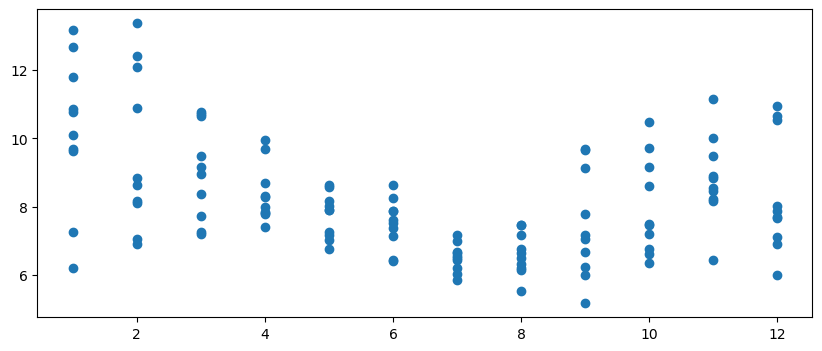

In [54]:
plt.figure(figsize=(10,4))
plt.scatter(df4['Month'],df4['Wind - Mean Speed (kn)'])
plt.show()

* Wind speeds registered during the month of **January** and **February** are the highest.
* Wind speeds registered during the month of **July** and **August** are the lowest throughout the years.

# 3. Hypothesis testing

## 3.1 Normality Test

### Shapiro-Wilk Test : test to find if the data is normally distributed
Assumption : Observations are identically distributed

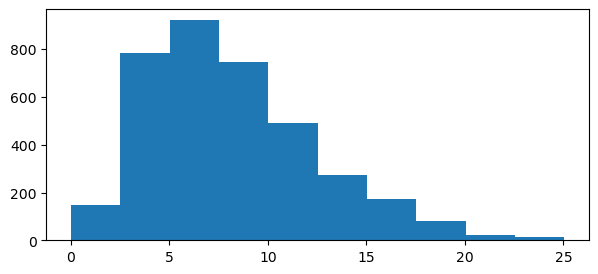

In [21]:
#Cheking Histogram
%matplotlib inline
plt.figure(figsize=(7,3))
plt.hist(df3['Wind - Mean Speed (kn)'])
plt.show()

In [23]:
from scipy.stats import shapiro

Data = df3['Wind - Mean Speed (kn)']
stat, p = shapiro(Data)
print('stat=%.2f, p=%.30f' % (stat, p))
if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.95, p=0.000000000000000000000000000000
Not a normal distribution


### K^2 Normality Test : tests If data is normally distributed
Assumption : Observations are identically distributed

In [55]:
from scipy.stats import normaltest

stat, p = normaltest(Data)
print('stat=%.10f, p=%.10f' % (stat, p))
if p > 0.05:
    print('Normal Distribution')
else:
    print('Not a Normal distribution')

stat=358.5164124315, p=0.0000000000
Not a Normal distribution


## 3.2 Correlation Test - Pearson and Spearman’s Rank Correlation
Asumption - Identical and Normal Distribution
To find the dependency of windspeed with various metrices

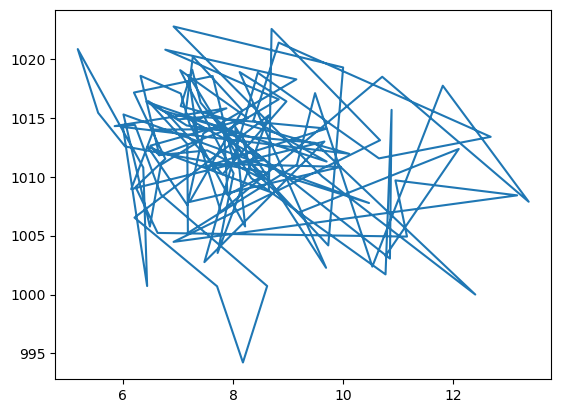

In [30]:
Sample = df4['Wind - Mean Speed (kn)']
SecondSample = df4['Pressure at Mean Sea Level (hPa)']

plt.plot(Sample,SecondSample)
plt.show()

In [69]:
df4.columns

Index(['Year', 'Month', 'Wind - Mean Speed (kn)', 'Wind - Mean Direction',
       'Wind - Max Gust Speed (kn)', 'Pressure at Mean Sea Level (hPa)',
       'Relative Humidity', 'Temperature - Dry Bulb (°C)'],
      dtype='object')

### Spearman Rank Correlation

* Relation between Wind - Mean Speed (kn) and All the Other Factors.

In [70]:
FirstSample = df4['Wind - Mean Direction']
SecondSample = df4['Pressure at Mean Sea Level (hPa)']
ThirdSample = df4['Relative Humidity']
ForthSample = df4['Temperature - Dry Bulb (°C)']
FifthSample = df4['Wind - Max Gust Speed (kn)']
SixthSample = df4['Month']

column=['Wind - Mean Direction','Pressure at Mean Sea Level (hPa)', 'Relative Humidity',
        'Temperature - Dry Bulb (°C)', 'Wind - Max Gust Speed (kn)','Month']

In [72]:
from scipy.stats import spearmanr

rel=[FirstSample,SecondSample,ThirdSample,ForthSample,FifthSample,SixthSample]
j=0

for i in rel:
    stat, p = spearmanr(Sample, i)
    print("_____________________________________________\n")
    print(column[j])
    print('stat=%.3f, p=%5f' % (stat, p))
    if p > 0.05:
        print('Independent samples')
    else:
        print('Dependent samples')
    j=j+1

_____________________________________________

Wind - Mean Direction
stat=0.549, p=0.000000
Dependent samples
_____________________________________________

Pressure at Mean Sea Level (hPa)
stat=-0.201, p=0.027699
Dependent samples
_____________________________________________

Relative Humidity
stat=-0.107, p=0.245749
Independent samples
_____________________________________________

Temperature - Dry Bulb (°C)
stat=-0.528, p=0.000000
Dependent samples
_____________________________________________

Wind - Max Gust Speed (kn)
stat=0.991, p=0.000000
Dependent samples
_____________________________________________

Month
stat=-0.273, p=0.002556
Dependent samples


### pearson correlation

In [73]:
from scipy.stats import pearsonr

j=0
for i in rel:
    stat, p = pearsonr(Sample, i)
    print("_____________________________________________\n")
    print(column[j])
    print('stat=%.3f, p=%5f' % (stat, p))
    if p > 0.05:
        print('Independent samples')
    else:
        print('Dependent samples')
    j=j+1

_____________________________________________

Wind - Mean Direction
stat=0.546, p=0.000000
Dependent samples
_____________________________________________

Pressure at Mean Sea Level (hPa)
stat=-0.224, p=0.014064
Dependent samples
_____________________________________________

Relative Humidity
stat=-0.090, p=0.326729
Independent samples
_____________________________________________

Temperature - Dry Bulb (°C)
stat=-0.521, p=0.000000
Dependent samples
_____________________________________________

Wind - Max Gust Speed (kn)
stat=0.993, p=0.000000
Dependent samples
_____________________________________________

Month
stat=-0.313, p=0.000504
Dependent samples


* Columns **'Wind - Mean Direction','Pressure at Mean Sea Level (hPa)', 'Relative Humidity','Temperature - Dry Bulb (°C)', 'Wind - Max Gust Speed (kn)'** and **'Month'** all have a high correlation with **'Wind - Mean Speed (kn)'**
* The only metrics which dont have a correlation with the **'Wind - Mean Speed (kn)'** is **Relative Humidity** column.

In [67]:
cor=round(df4.corr(method="pearson"),3)

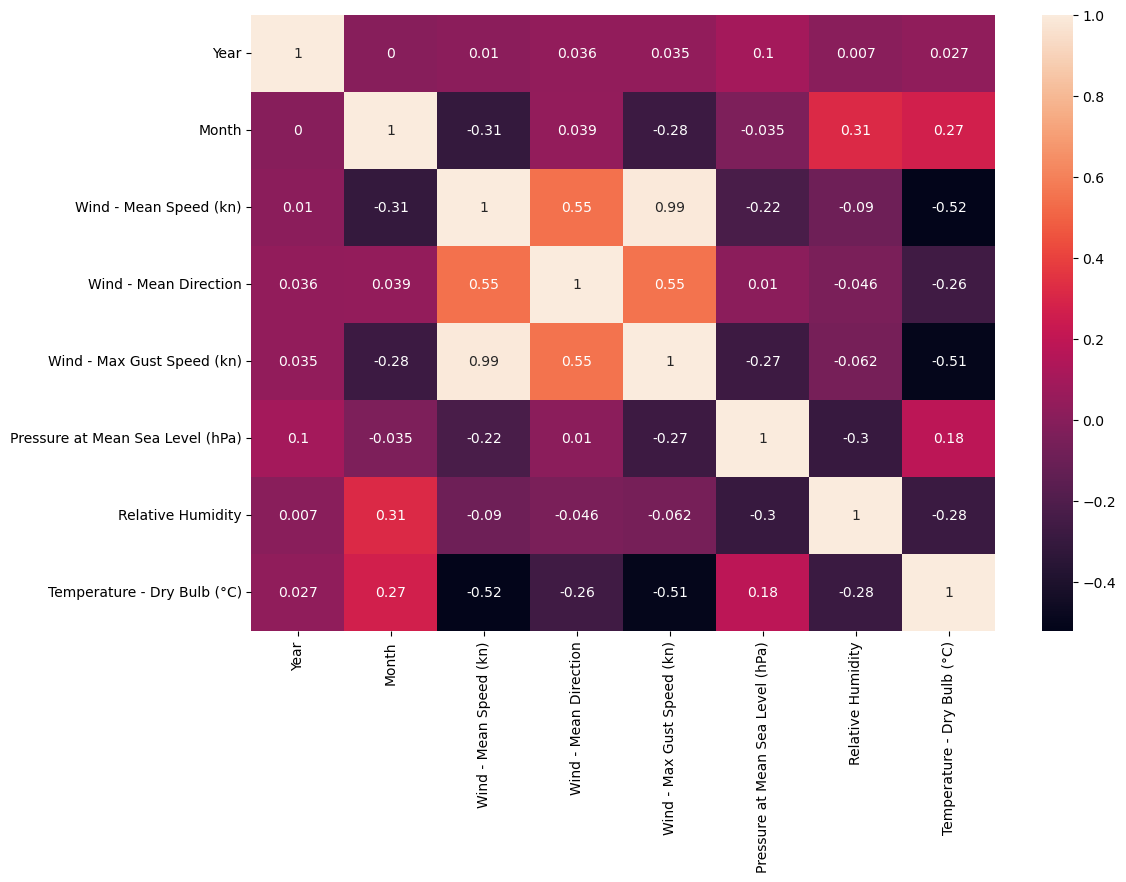

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True)
plt.show()

# 4. Test of Stationarity for time series analysis

## 4.1 Augmented Dickey-Fuller Test
* Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
* Alternate Hypothesis(HA): Series is stationary, or series has no unit root.


In [83]:
from statsmodels.tsa.stattools import adfuller

j=0
for i in rel:
    stat, p, lags, obs, crit, t = adfuller(i)
    print("_____________________________________________\n")
    print(column[j])
    print('stat=%.3f, p=%5f' % (stat, p))
    if p > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is stationary')
    j=j+1

_____________________________________________

Wind - Mean Direction
stat=-6.098, p=0.000000
Series is stationary
_____________________________________________

Pressure at Mean Sea Level (hPa)
stat=-9.537, p=0.000000
Series is stationary
_____________________________________________

Relative Humidity
stat=-5.747, p=0.000001
Series is stationary
_____________________________________________

Temperature - Dry Bulb (°C)
stat=-1.966, p=0.301668
Series is not Stationary
_____________________________________________

Wind - Max Gust Speed (kn)
stat=-6.407, p=0.000000
Series is stationary
_____________________________________________

Month
stat=-207894290926852.844, p=0.000000
Series is stationary


## 4.2 Kwiatkowski-Phillips-Schmidt-Shin test

* Null hypothesis (H0) - An observable time series is stationary around a deterministic trend.

In [93]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import kpss

j=0
for i in rel:
    kpss_stat, p, lags, crit = kpss(i,regression="ct")
    print("_____________________________________________\n")
    print(column[j])
    print('stat=%.3f, p=%5f' % (kpss_stat, p))
    if p > 0.05:
        print('Series is Stationary')
    else:
        print('Series is not stationary')
    j=j+1

_____________________________________________

Wind - Mean Direction
stat=0.040, p=0.100000
Series is Stationary
_____________________________________________

Pressure at Mean Sea Level (hPa)
stat=0.090, p=0.100000
Series is Stationary
_____________________________________________

Relative Humidity
stat=0.070, p=0.100000
Series is Stationary
_____________________________________________

Temperature - Dry Bulb (°C)
stat=0.015, p=0.100000
Series is Stationary
_____________________________________________

Wind - Max Gust Speed (kn)
stat=0.073, p=0.100000
Series is Stationary
_____________________________________________

Month
stat=0.021, p=0.100000
Series is Stationary


## Chi square test

In [ ]:
#Tests whether two categorical variables are related or independent.
#Assumptions - independent observation, size in each box of contingency table > 25
# Example of the Chi-Squared Test


In [76]:
contingency_data = pd.crosstab( df3['Wind - Mean Speed (kn)'],df3['Month'],margins = False)

In [78]:
from scipy.stats import chi2_contingency

In [79]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=5462.669, p=0.001
dependent categories


## 5.Parametic test

### 5.1. Z-Test

In [82]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(df3['Wind - Mean Speed (kn)'],df3['Month'])

(18.49753946336752, 2.1611777521216474e-76)

In [ ]:
#Apired sample t-test
scipy.stats.ttest_rel(my_score,my_score_second_Tour)

Ttest_relResult(statistic=-13.88788431654638, pvalue=2.1983272300073563e-07)

### 5.2. Anova
* Tests whether the means of two or more independent samples are significantly different.
* Assumption -  Normal distributon, same variance, identical distribution

In [ ]:
tstat, p = scipy.stats.f_oneway(df3['Wind - Mean Speed (kn)'],df3['Month'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution of scores')
else:
    print('Different distributions of scores')

stat=-0.949, p=0.000
Different distributions of scores


## 6. Non Parametric test 1

### 6.1 Mann-Whitney U Test
* Tests whether the distributions of two or more independent samples are equal or not.

In [ ]:
#Assumptions - Idential distribution, observations can be ranked

In [ ]:
class_1_score = [91,90,81,80,76]
class_2_score = [88,86,85,84,83]

In [ ]:
tstat, p = scipy.stats.mannwhitneyu(class_1_score, class_2_score)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution')
else:
    print('Different distributions')

stat=-0.949, p=0.338
Same distribution
